<a href="https://colab.research.google.com/github/Yulia74/Python_seminars/blob/main/sem_10_task_063.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача №63.
1. Изобразите отношение households к population с
помощью точечного графика

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df=pd.read_csv('sample_data/california_housing_train.csv')

In [17]:
df.head(n=5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


<AxesSubplot:xlabel='households', ylabel='population'>

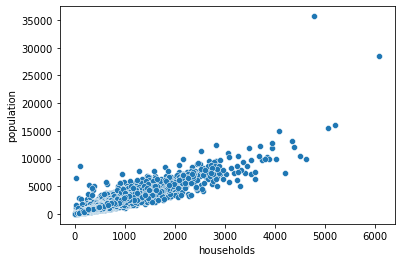

In [18]:
sns.scatterplot(data=df, x='households', y='population')

исключаем выбросы данных

<AxesSubplot:xlabel='households', ylabel='population'>

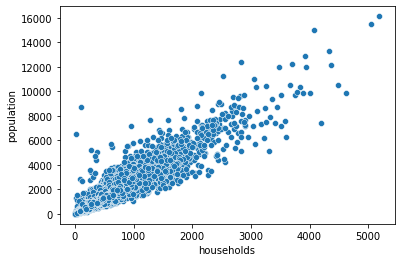

In [19]:
sns.scatterplot(data=df, x=df.query('households <=5500')['households'], y=df.query('population <= 30000')['population'])

2. Визуализировать longitude по отношения к
median_house_value, используя линейный график

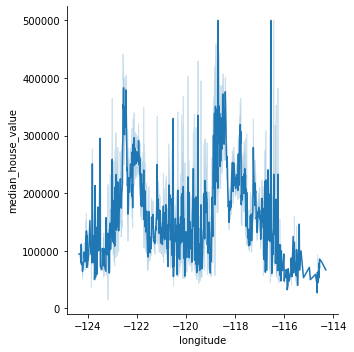

In [22]:
sns.relplot(x='longitude', y='median_house_value', kind='line', data=df)

аналогичная запись кода

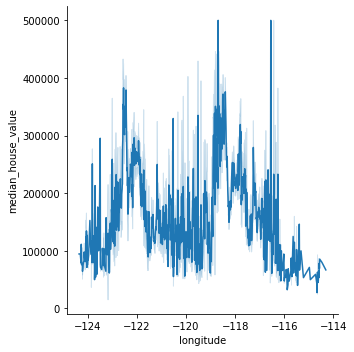

In [21]:
sns.relplot(x=df.longitude, y=df.median_house_value, kind='line')

3. Представить гистограмму по housing_median_age

<AxesSubplot:xlabel='housing_median_age', ylabel='Count'>

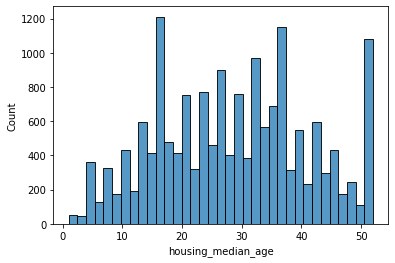

In [23]:
sns.histplot(data=df, x='housing_median_age')

аналогичная запись кода

<AxesSubplot:xlabel='housing_median_age', ylabel='Count'>

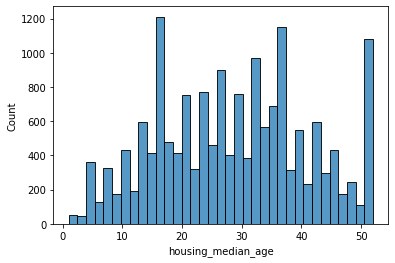

In [24]:
sns.histplot(x=df.housing_median_age)

для более подробного анализа столбцов (создания новых столбцов), можно применять функции

In [25]:
def age(x):
  if x <= 10:
    return '0-10'
  elif x > 10 and x <= 20:
    return '11-20'
  elif x > 20 and x <= 30:
    return '21-30'
  elif x > 30 and x <= 40:
    return '31-40'
  elif x > 40 and x <= 50:
    return '41-50'
  elif x > 50 and x <= 60:
    return '51-60'

Создали новый столбец age

In [27]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,age
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,11-20
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,11-20
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,11-20
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,11-20
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,11-20
...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,51-60
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,31-40
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,11-20
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,11-20


In [29]:
df['age'] = df.housing_median_age.apply(age)

<AxesSubplot:xlabel='age', ylabel='Count'>

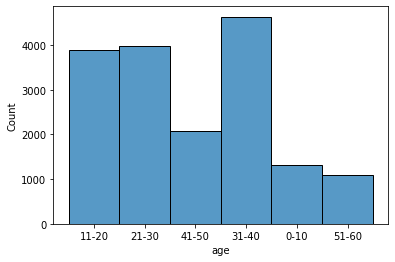

In [30]:
sns.histplot(x=df.age)

пример query на множественный запрос в одном запросе

<AxesSubplot:xlabel='housing_median_age', ylabel='Count'>

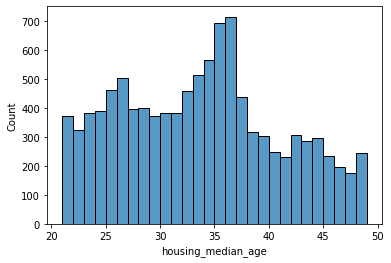

In [31]:
sns.histplot(x = df.query('housing_median_age > 20 and  housing_median_age < 50') ['housing_median_age'])

<AxesSubplot:xlabel='housing_median_age', ylabel='Count'>

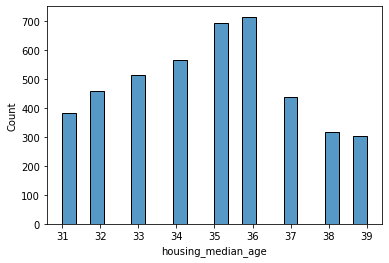

In [32]:
sns.histplot(x = df.query('housing_median_age > 30 and  housing_median_age < 40') ['housing_median_age'])

4. Изобразить гистограмму по median_house_value с
оттенком housing_median_age

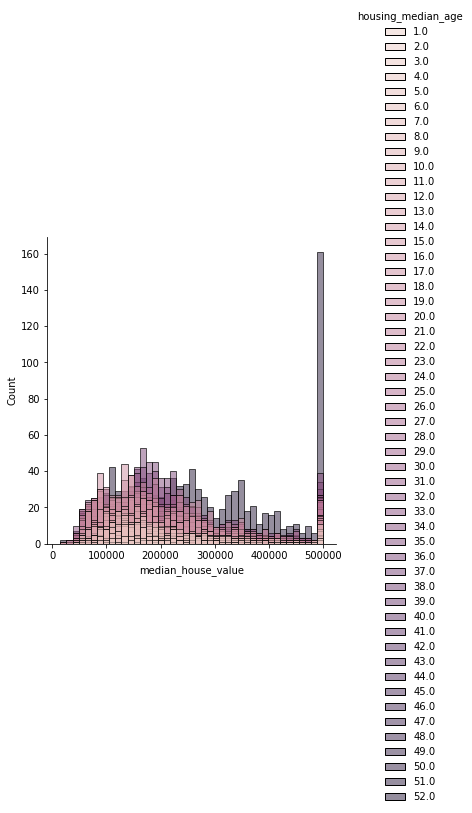

In [36]:
sns.displot(data=df, x='median_house_value', hue='housing_median_age')   # histplot==displot

не очень информативно получилось, опять будем использовать созданный столбец age

<Figure size 720x4320 with 0 Axes>

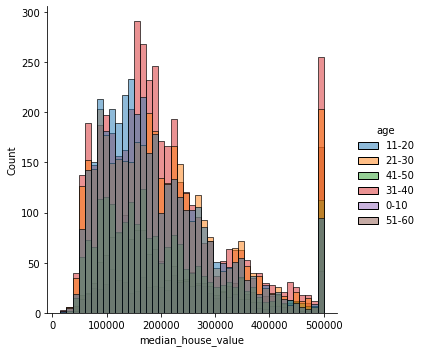

<Figure size 720x4320 with 0 Axes>

In [40]:
sns.displot(data=df, x='median_house_value', hue='age')
plt.figure(figsize=(60, 60))                                         # меняет размер диаграммы